## ML Project

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import date
import numpy as np

In [2]:
file = "aac_shelter_outcomes.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df['animal_type'].value_counts()

Dog          44242
Cat          29422
Other         4249
Bird           334
Livestock        9
Name: animal_type, dtype: int64

In [5]:
df.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome'],
      dtype='object')

In [6]:
dog_df = df.loc[df['animal_type'] == 'Dog']

In [7]:
len(dog_df['breed'].unique())

1893

In [8]:
table = pd.pivot_table(dog_df, values='animal_id', index=['breed'], aggfunc='count')
table = table.reset_index()
table = table.rename(columns={"animal_id": "count"})
table = table.sort_values(by='count', ascending=False)

In [9]:
new_table = table.head(10)
top_10_breeds = new_table['breed'].to_list()
top_10_breeds

['Pit Bull Mix',
 'Chihuahua Shorthair Mix',
 'Labrador Retriever Mix',
 'German Shepherd Mix',
 'Australian Cattle Dog Mix',
 'Dachshund Mix',
 'Boxer Mix',
 'Miniature Poodle Mix',
 'Border Collie Mix',
 'Catahoula Mix']

## Clean Dog Dataframe

In [10]:
dog_df.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome'],
      dtype='object')

In [11]:
dog_df['outcome_subtype'].value_counts()

Partner                9516
Foster                 2162
Suffering               684
Aggressive              501
Offsite                 254
Behavior                142
In Kennel                87
Rabies Risk              85
Medical                  60
At Vet                   23
In Foster                23
Court/Investigation      18
In Surgery                7
Possible Theft            7
Enroute                   4
Barn                      1
Snr                       1
Name: outcome_subtype, dtype: int64

In [12]:
dog_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23T00:00:00,2014-12-08T15:55:00,2014-12-08T15:55:00,*Ella,Partner,Transfer,Spayed Female


In [13]:
# clean date of birth and datetime columns
dog_df['date_of_birth'] = dog_df['date_of_birth'].str.split('T', n=1, expand=True)
dog_df['datetime'] = dog_df['datetime'].str.split('T', n=1, expand=True)

/Users/meganl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/meganl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# change date of birth and datetime types to date time
dog_df['date_of_birth'] = pd.to_datetime(dog_df['date_of_birth'])
dog_df['datetime'] = pd.to_datetime(dog_df['datetime'])

/Users/meganl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/meganl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
dog_df.dtypes

age_upon_outcome            object
animal_id                   object
animal_type                 object
breed                       object
color                       object
date_of_birth       datetime64[ns]
datetime            datetime64[ns]
monthyear                   object
name                        object
outcome_subtype             object
outcome_type                object
sex_upon_outcome            object
dtype: object

In [16]:
dog_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03,2013-10-07,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23,2014-12-08,2014-12-08T15:55:00,*Ella,Partner,Transfer,Spayed Female


In [17]:
# calculate the age in months for each row
dog_df['age_months'] = ((dog_df.datetime - dog_df.date_of_birth)/np.timedelta64(1, 'M'))

/Users/meganl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
dog_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,age_months
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,12.024888
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,14.094745
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,108.421117
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03,2013-10-07,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male,4.139715
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23,2014-12-08,2014-12-08T15:55:00,*Ella,Partner,Transfer,Spayed Female,36.501776


In [19]:
#filter dog df to the following breeds
dog_df = dog_df.loc[(dog_df['breed']== 'Pit Bull Mix') |
                   (dog_df['breed']== 'Chihuahua Shorthair Mix') |
                   (dog_df['breed']== 'Labrador Retriever Mix') |
                    (dog_df['breed']== 'German Shepherd Mix') |
                    (dog_df['breed']== 'Australian Cattle Dog Mix') |
                    (dog_df['breed']== 'Dachshund Mix') |
                    (dog_df['breed']== 'Boxer Mix') |
                    (dog_df['breed']== 'Miniature Poodle Mix') |
                    (dog_df['breed']== 'Border Collie Mix') |
                    (dog_df['breed']== 'Catahoula Mix')]

dog_df = dog_df.loc[(dog_df['sex_upon_outcome'] != 'Unknown')]

In [20]:
dog_df['sex_upon_outcome'].value_counts()

Neutered Male    8935
Spayed Female    8011
Intact Male      2402
Intact Female    2169
Name: sex_upon_outcome, dtype: int64

In [21]:
# split sex_upon_outcome column to 2 separate columns: gender and neutered/inact/spayed
new=dog_df['sex_upon_outcome'].str.split(" ", n=1, expand=True)
dog_df["gender"]= new[1] 
dog_df["neutered_intact_spayed"]=new[0]

In [22]:
dog_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,age_months,gender,neutered_intact_spayed
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23,2014-12-08,2014-12-08T15:55:00,*Ella,Partner,Transfer,Spayed Female,36.501776,Female,Spayed
14,8 years,A690350,Dog,Labrador Retriever Mix,Black,2006-10-18,2014-10-26,2014-10-26T18:20:00,Shy,NaN,Return to Owner,Neutered Male,96.264810,Male,Neutered
16,1 year,A674298,Dog,Pit Bull Mix,Brown Brindle/White,2013-03-11,2014-04-16,2014-04-16T12:51:00,*Newt,Partner,Transfer,Neutered Male,13.174809,Male,Neutered
27,2 months,A667311,Dog,Labrador Retriever Mix,Yellow,2013-09-01,2013-11-19,2013-11-19T18:30:00,Promise,NaN,Adoption,Spayed Female,2.595536,Female,Spayed
28,4 months,A690699,Dog,Chihuahua Shorthair Mix,Blue/Tan,2014-06-17,2014-11-04,2014-11-04T18:03:00,Minnie,Partner,Transfer,Intact Female,4.599684,Female,Intact


In [23]:
#function to group colors 
def color_mapper(color_string):
    split_array = color_string.split('/')
    first_color = split_array[0]
    if (len(split_array) > 1):
        first_color_split = first_color.split(' ')
        return first_color_split[0] + ' Mix'
    else:
        first_color_split = first_color.split(' ')
        return first_color_split[0]

# print(color_mapper('Black'))
# print(color_mapper('Black/Brown'))
# print(color_mapper('Black Blue/White'))
# print(color_mapper('Brown Tiger'))

In [24]:
#apply color function
dog_df['color'] = df['color'].apply(color_mapper)
dog_df

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,age_months,gender,neutered_intact_spayed
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23,2014-12-08,2014-12-08T15:55:00,*Ella,Partner,Transfer,Spayed Female,36.501776,Female,Spayed
14,8 years,A690350,Dog,Labrador Retriever Mix,Black,2006-10-18,2014-10-26,2014-10-26T18:20:00,Shy,NaN,Return to Owner,Neutered Male,96.264810,Male,Neutered
16,1 year,A674298,Dog,Pit Bull Mix,Brown Mix,2013-03-11,2014-04-16,2014-04-16T12:51:00,*Newt,Partner,Transfer,Neutered Male,13.174809,Male,Neutered
27,2 months,A667311,Dog,Labrador Retriever Mix,Yellow,2013-09-01,2013-11-19,2013-11-19T18:30:00,Promise,NaN,Adoption,Spayed Female,2.595536,Female,Spayed
28,4 months,A690699,Dog,Chihuahua Shorthair Mix,Blue Mix,2014-06-17,2014-11-04,2014-11-04T18:03:00,Minnie,Partner,Transfer,Intact Female,4.599684,Female,Intact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78246,2 years,A738395,Dog,Chihuahua Shorthair Mix,Black Mix,2015-11-14,2018-02-01,2018-02-01T18:23:00,Maxie,NaN,Adoption,Neutered Male,26.612456,Male,Neutered
78247,2 years,A761266,Dog,Border Collie Mix,Black Mix,2015-11-01,2018-02-01,2018-02-01T18:32:00,Baily,NaN,Return to Owner,Spayed Female,27.039570,Female,Spayed
78248,1 year,A725872,Dog,German Shepherd Mix,Tan Mix,2016-02-03,2018-02-01,2018-02-01T18:20:00,Lova,NaN,Return to Owner,Intact Female,23.951210,Female,Intact
78249,2 years,A761265,Dog,Border Collie Mix,Black Mix,2015-11-01,2018-02-01,2018-02-01T18:31:00,Lucas,NaN,Return to Owner,Neutered Male,27.039570,Male,Neutered


In [25]:
len(dog_df['color'].unique())

36

In [26]:
#clean colors 
color = {'Orange': 'Apricot',
         'Liver Mix': 'Brown Mix',
         'Liver': 'Brown',
         'Buff': 'Brown',
         "Buff Mix": 'Brown Mix',
         "Cream": "Yellow",
         "Cream Mix": "Yellow",
         "Fawn": "Yellow",
         "Fawn Mix": "Yellow Mix",
         "Gold": "Yellow",
         "Gold Mix": "Yellow Mix",
         "Sable": 'Brown',
         "Sable Mix": "Brown Mix",
         "Silver Mix": "Gray",
         "Chocolate": "Brown",
         "Chocolate Mix": "Brown Mix"}

dog_df['color'] = dog_df['color'].replace(color)

In [27]:
dog_df['color'].value_counts()

Black Mix       4397
Brown Mix       3463
White Mix       2290
Brown           2069
Tan Mix         1632
Black           1527
Blue Mix        1129
Tan             1065
White            859
Yellow           707
Tricolor         601
Red Mix          519
Red              457
Yellow Mix       343
Blue             322
Gray Mix          39
Tricolor Mix      37
Apricot           27
Gray              25
Apricot Mix       10
Name: color, dtype: int64

In [28]:
#creating color list
color_weights = set(dog_df['color'].array)
color_weights = list(color_weights)
color_weights

['Tricolor',
 'Red',
 'Tan Mix',
 'Blue',
 'Blue Mix',
 'Black Mix',
 'Yellow',
 'Yellow Mix',
 'Brown Mix',
 'Gray Mix',
 'Black',
 'Tricolor Mix',
 'White',
 'Brown',
 'Tan',
 'Apricot',
 'Red Mix',
 'White Mix',
 'Gray',
 'Apricot Mix']

In [29]:
#apply color weights
dog_df['color_weights'] = dog_df['color'].apply(lambda color: color_weights.index(color))
dog_df

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,age_months,gender,neutered_intact_spayed,color_weights
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23,2014-12-08,2014-12-08T15:55:00,*Ella,Partner,Transfer,Spayed Female,36.501776,Female,Spayed,13
14,8 years,A690350,Dog,Labrador Retriever Mix,Black,2006-10-18,2014-10-26,2014-10-26T18:20:00,Shy,NaN,Return to Owner,Neutered Male,96.264810,Male,Neutered,10
16,1 year,A674298,Dog,Pit Bull Mix,Brown Mix,2013-03-11,2014-04-16,2014-04-16T12:51:00,*Newt,Partner,Transfer,Neutered Male,13.174809,Male,Neutered,8
27,2 months,A667311,Dog,Labrador Retriever Mix,Yellow,2013-09-01,2013-11-19,2013-11-19T18:30:00,Promise,NaN,Adoption,Spayed Female,2.595536,Female,Spayed,6
28,4 months,A690699,Dog,Chihuahua Shorthair Mix,Blue Mix,2014-06-17,2014-11-04,2014-11-04T18:03:00,Minnie,Partner,Transfer,Intact Female,4.599684,Female,Intact,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78246,2 years,A738395,Dog,Chihuahua Shorthair Mix,Black Mix,2015-11-14,2018-02-01,2018-02-01T18:23:00,Maxie,NaN,Adoption,Neutered Male,26.612456,Male,Neutered,5
78247,2 years,A761266,Dog,Border Collie Mix,Black Mix,2015-11-01,2018-02-01,2018-02-01T18:32:00,Baily,NaN,Return to Owner,Spayed Female,27.039570,Female,Spayed,5
78248,1 year,A725872,Dog,German Shepherd Mix,Tan Mix,2016-02-03,2018-02-01,2018-02-01T18:20:00,Lova,NaN,Return to Owner,Intact Female,23.951210,Female,Intact,2
78249,2 years,A761265,Dog,Border Collie Mix,Black Mix,2015-11-01,2018-02-01,2018-02-01T18:31:00,Lucas,NaN,Return to Owner,Neutered Male,27.039570,Male,Neutered,5


In [30]:
#clean dataframe to only selected columns
dog_df = dog_df[['breed', 'color', 'outcome_type', 'age_months', 'gender', 
                 'neutered_intact_spayed', 'color_weights']]

In [31]:
#drop any NaN rows
dog_df = dog_df.dropna()

In [32]:
dog_df.count()

breed                     21515
color                     21515
outcome_type              21515
age_months                21515
gender                    21515
neutered_intact_spayed    21515
color_weights             21515
dtype: int64

In [33]:
dog_df.columns

Index(['breed', 'color', 'outcome_type', 'age_months', 'gender',
       'neutered_intact_spayed', 'color_weights'],
      dtype='object')

In [34]:
#create breed list
breed_list = set(dog_df['breed'].array)
breed_list = list(breed_list)

#create breed weights
dog_df['breed_weights'] = dog_df['breed'].apply(lambda breed: breed_list.index(breed))
dog_df.head()
dog_df['breed_weights'].value_counts()

8    6113
3    4707
1    4562
5    1878
4    1051
6     783
2     662
7     645
0     639
9     475
Name: breed_weights, dtype: int64

In [35]:
dog_df.head()

,breed,color,outcome_type,age_months,gender,neutered_intact_spayed,color_weights,breed_weights
7,Chihuahua Shorthair Mix,Brown,Transfer,36.501776,Female,Spayed,13,3
14,Labrador Retriever Mix,Black,Return to Owner,96.264810,Male,Neutered,10,1
16,Pit Bull Mix,Brown Mix,Transfer,13.174809,Male,Neutered,8,8
27,Labrador Retriever Mix,Yellow,Adoption,2.595536,Female,Spayed,6,1
28,Chihuahua Shorthair Mix,Blue Mix,Transfer,4.599684,Female,Intact,4,3


In [36]:
dog_df['outcome_type'].value_counts()
dog_df.count()

breed                     21515
color                     21515
outcome_type              21515
age_months                21515
gender                    21515
neutered_intact_spayed    21515
color_weights             21515
breed_weights             21515
dtype: int64

In [37]:
dog_df['outcome_type'].value_counts()

Adoption           9778
Return to Owner    6186
Transfer           4541
Euthanasia          860
Died                 67
Rto-Adopt            62
Missing              14
Disposal              7
Name: outcome_type, dtype: int64

In [38]:
#clean outcome column
outcome = {'Rto-Adopt': 'Adopted',
           'Disposal': 'Not Adopted',
           'Died': 'Not Adopted',
           'Euthanasia': 'Not Adopted',
           'Adoption': 'Adopted',
           'Return to Owner': 'Adopted',
           'Missing': 'Not Adopted',
           'Transfer': 'Not Adopted'}

dog_df['outcome_type'] = dog_df['outcome_type'].replace(outcome)
dog_df['outcome_type'].value_counts()

Adopted        16026
Not Adopted     5489
Name: outcome_type, dtype: int64

In [39]:
#outcome list
outcome = set(dog_df['outcome_type'].array)
outcome_list = list(outcome)
outcome_list

#create outcome weights
dog_df['outcome_weights'] = dog_df['outcome_type'].apply(lambda outcome: outcome_list.index(outcome))
dog_df.head()
dog_df['outcome_weights'].value_counts()

1    16026
0     5489
Name: outcome_weights, dtype: int64

In [40]:
dog_df.head()
dog_df=dog_df.loc[dog_df['outcome_type'] != 'Missing']

dog_df['outcome_type'].value_counts()

Adopted        16026
Not Adopted     5489
Name: outcome_type, dtype: int64

In [41]:
#gender list
gender = set(dog_df['gender'].array)
gender_list = list(gender)
gender_list

#create gender weights
dog_df['gender_weights'] = dog_df['gender'].apply(lambda gender: gender_list.index(gender))
dog_df.head()
dog_df['gender_weights'].value_counts()

0    11336
1    10179
Name: gender_weights, dtype: int64

In [42]:
#clean outcome column
neuter = {'Spayed': 'Fixed',
         'Neutered': 'Fixed'}

dog_df['neutered_intact_spayed'] = dog_df['neutered_intact_spayed'].replace(neuter)
dog_df['neutered_intact_spayed'].value_counts()

Fixed     16946
Intact     4569
Name: neutered_intact_spayed, dtype: int64

In [43]:
#neutered list
neuter = set(dog_df['neutered_intact_spayed'].array)
neuter_list = list(neuter)
neuter_list

#create gender weights
dog_df['fixed_weights'] = dog_df['neutered_intact_spayed'].apply(lambda neuter: neuter_list.index(neuter))
dog_df.head()
dog_df['fixed_weights'].value_counts()

1    16946
0     4569
Name: fixed_weights, dtype: int64

In [44]:
dog_df.head()

,breed,color,outcome_type,age_months,gender,neutered_intact_spayed,color_weights,breed_weights,outcome_weights,gender_weights,fixed_weights
7,Chihuahua Shorthair Mix,Brown,Not Adopted,36.501776,Female,Fixed,13,3,0,1,1
14,Labrador Retriever Mix,Black,Adopted,96.264810,Male,Fixed,10,1,1,0,1
16,Pit Bull Mix,Brown Mix,Not Adopted,13.174809,Male,Fixed,8,8,0,0,1
27,Labrador Retriever Mix,Yellow,Adopted,2.595536,Female,Fixed,6,1,1,1,1
28,Chihuahua Shorthair Mix,Blue Mix,Not Adopted,4.599684,Female,Intact,4,3,0,1,0


In [45]:
dog_df.columns

Index(['breed', 'color', 'outcome_type', 'age_months', 'gender',
       'neutered_intact_spayed', 'color_weights', 'breed_weights',
       'outcome_weights', 'gender_weights', 'fixed_weights'],
      dtype='object')

In [46]:
dog_df['outcome_type'].value_counts()

Adopted        16026
Not Adopted     5489
Name: outcome_type, dtype: int64

In [47]:
# test_df = dog_df[['outcome_weights','age_months','color','color_weights', 'breed_weights', 
#                        'gender_weights', 'fixed_weights','gender', 'breed', 'neutered_intact_spayed']]
# test_df[test_df['fixed_weights']==2]

In [48]:
adopted = dog_df[dog_df['outcome_type'] == 'Adopted'].sample(n=5500)
adopted.head()

,breed,color,outcome_type,age_months,gender,neutered_intact_spayed,color_weights,breed_weights,outcome_weights,gender_weights,fixed_weights
11426,Labrador Retriever Mix,Black,Adopted,2.102713,Female,Fixed,10,1,1,1,1
20105,Chihuahua Shorthair Mix,Tan,Adopted,180.110475,Male,Intact,14,3,1,0,0
74709,German Shepherd Mix,Black Mix,Adopted,97.907555,Female,Fixed,5,5,1,1,1
13797,Chihuahua Shorthair Mix,Brown Mix,Adopted,84.009939,Male,Fixed,8,3,1,0,1
45756,Labrador Retriever Mix,Brown,Adopted,90.219512,Female,Fixed,13,1,1,1,1


In [49]:
not_adopted = dog_df[dog_df['outcome_type'] == 'Not Adopted']

In [79]:
not_adopted

,breed,color,outcome_type,age_months,gender,neutered_intact_spayed,color_weights,breed_weights,outcome_weights,gender_weights,fixed_weights
7,Chihuahua Shorthair Mix,Brown,Not Adopted,36.501776,Female,Fixed,13,3,0,1,1
16,Pit Bull Mix,Brown Mix,Not Adopted,13.174809,Male,Fixed,8,8,0,0,1
28,Chihuahua Shorthair Mix,Blue Mix,Not Adopted,4.599684,Female,Intact,4,3,0,1,0
47,Pit Bull Mix,Brown Mix,Not Adopted,26.382472,Female,Fixed,8,8,0,1,1
53,Pit Bull Mix,Black Mix,Not Adopted,83.122857,Female,Fixed,5,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
78130,Labrador Retriever Mix,Black Mix,Not Adopted,24.214050,Female,Fixed,5,1,0,1,1
78133,German Shepherd Mix,Brown Mix,Not Adopted,24.246904,Male,Intact,8,5,0,0,0
78136,Labrador Retriever Mix,Yellow,Not Adopted,51.943572,Male,Fixed,6,1,0,0,1
78138,Pit Bull Mix,Blue Mix,Not Adopted,48.395244,Female,Fixed,4,8,0,1,1


In [50]:
clean_df = pd.concat([adopted, not_adopted])

In [51]:
clean_df['outcome_type'].value_counts()

Adopted        5500
Not Adopted    5489
Name: outcome_type, dtype: int64

## Final Dog Dataframe

In [52]:
final_dog_df = clean_df[['outcome_weights','age_months','color_weights', 'breed_weights', 
                       'gender_weights', 'fixed_weights']]

In [53]:
final_dog_df.head()

,outcome_weights,age_months,color_weights,breed_weights,gender_weights,fixed_weights
11426,1,2.102713,10,1,1,1
20105,1,180.110475,14,3,0,0
74709,1,97.907555,5,5,1,1
13797,1,84.009939,8,3,0,1
45756,1,90.219512,13,1,1,1


In [54]:
final_dog_df['outcome_weights'] = final_dog_df['outcome_weights'] + 1
final_dog_df['color_weights'] = final_dog_df['color_weights'] + 1
final_dog_df['breed_weights'] = final_dog_df['breed_weights'] + 1
final_dog_df['gender_weights'] = final_dog_df['gender_weights'] + 1
final_dog_df['fixed_weights'] = final_dog_df['fixed_weights'] + 1

/Users/meganl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/meganl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/meganl/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [55]:
#convert dataframe to csv file
final_dog_df.to_csv('final_data.csv', index=False)

## ML

In [56]:
feature_names = ["age_months", 'color_weights', 'breed_weights', 'gender_weights', 'fixed_weights']
X = final_dog_df[feature_names]
y = final_dog_df['outcome_weights']
X

,age_months,color_weights,breed_weights,gender_weights,fixed_weights
11426,2.102713,11,2,2,2
20105,180.110475,15,4,1,1
74709,97.907555,6,6,2,2
13797,84.009939,9,4,1,2
45756,90.219512,14,2,2,2
...,...,...,...,...,...
78130,24.214050,6,2,2,2
78133,24.246904,9,6,1,1
78136,51.943572,7,2,1,2
78138,48.395244,5,9,2,2


In [106]:
X.to_csv('x_values.csv', index=False)

In [57]:
final_dog_df.head()

,outcome_weights,age_months,color_weights,breed_weights,gender_weights,fixed_weights
11426,2,2.102713,11,2,2,2
20105,2,180.110475,15,4,1,1
74709,2,97.907555,6,6,2,2
13797,2,84.009939,9,4,1,2
45756,2,90.219512,14,2,2,2


## Creating training and test sets

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Applying Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build Models

In [60]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

print('Accuracy of logistic regression on training', logreg.score(X_train_scaled, y_train))
print('Accuracy of logistic regression on testing', logreg.score(X_test_scaled, y_test))

Accuracy of logistic regression on training 0.6821987622861303
Accuracy of logistic regression on testing 0.6812227074235808


/Users/meganl/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

print('Accuracy of Decision tree on training', dt.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.9770658900618857
Accuracy of Decision tree on testing 0.62627365356623


In [74]:
# Setting max decision tree depth to help avoid overfitting
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(X_train_scaled, y_train)
print(f'{branch}')
print('Accuracy of Decision tree on training', dt2.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt2.score(X_test_scaled, y_test))


14
Accuracy of Decision tree on training 0.6866885086761315
Accuracy of Decision tree on testing 0.6786754002911208


In [63]:
# K-nearest neighbor 
from sklearn.neighbors import KNeighborsClassifier

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    print('k = ', k)
    print('Accuracy of Knn on training', knn.score(X_train_scaled, y_train))
    print('Accuracy of Knn on testing', knn.score(X_test_scaled, y_test))

k =  1
Accuracy of Knn on training 0.9745176556243175
Accuracy of Knn on testing 0.6135371179039302
k =  2
Accuracy of Knn on training 0.8017230918577842
Accuracy of Knn on testing 0.6106259097525473
k =  3
Accuracy of Knn on training 0.7983254459410266
Accuracy of Knn on testing 0.6284570596797671
k =  4
Accuracy of Knn on training 0.7554908384904745
Accuracy of Knn on testing 0.6149927219796215
k =  5
Accuracy of Knn on training 0.7563402499696639
Accuracy of Knn on testing 0.645924308588064
k =  6
Accuracy of Knn on training 0.7365610969542531
Accuracy of Knn on testing 0.6302765647743813
k =  7
Accuracy of Knn on training 0.7348622739958743
Accuracy of Knn on testing 0.6495633187772926
k =  8
Accuracy of Knn on training 0.7228491687901953
Accuracy of Knn on testing 0.6462882096069869
k =  9
Accuracy of Knn on training 0.7227278242931683
Accuracy of Knn on testing 0.6590247452692868


In [64]:
# Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled,y_train)
print('Accuracy of Linear Discriminant on training', lda.score(X_train_scaled, y_train))
print('Accuracy of Linear Discriminant on testing', lda.score(X_test_scaled, y_test))

Accuracy of Linear Discriminant on training 0.6821987622861303
Accuracy of Linear Discriminant on testing 0.6812227074235808


In [65]:
# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print('Accuracy of GNB on training', gnb.score(X_train_scaled, y_train))
print('Accuracy of GNB on testing', gnb.score(X_test_scaled, y_test))

Accuracy of GNB on training 0.6821987622861303
Accuracy of GNB on testing 0.6812227074235808


In [66]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)
print('Accuracy of SVM on training', svm.score(X_train_scaled, y_train))
print('Accuracy of SVM on testing', svm.score(X_test_scaled, y_test))

/Users/meganl/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM on training 0.6821987622861303
Accuracy of SVM on testing 0.6812227074235808


In [67]:
# "age_months", 'color_weights', 'breed_weights', 'gender_weights', 'neuter_weights'
for i in outcome_list:
#     print(i)
    index_num = outcome_list.index(i)
    print(f' {i}: {index_num} <br>')
    
for i in breed_list:
#     print(i)
    index_num = breed_list.index(i)
    print(f' {i}: {index_num} <br>')
    
for i in gender_list:
#     print(i)
    index_num = gender_list.index(i)
    print(f' {i}: {index_num} <br>')
    
for i in neuter_list:
#     print(i)
    index_num = neuter_list.index(i)
    print(f' {i}: {index_num} <br>')
    


 Not Adopted: 0 <br>
 Adopted: 1 <br>
 Border Collie Mix: 0 <br>
 Labrador Retriever Mix: 1 <br>
 Boxer Mix: 2 <br>
 Chihuahua Shorthair Mix: 3 <br>
 Australian Cattle Dog Mix: 4 <br>
 German Shepherd Mix: 5 <br>
 Dachshund Mix: 6 <br>
 Miniature Poodle Mix: 7 <br>
 Pit Bull Mix: 8 <br>
 Catahoula Mix: 9 <br>
 Male: 0 <br>
 Female: 1 <br>
 Intact: 0 <br>
 Fixed: 1 <br>


## Weight Legend

<b> Outcome </b> <br>
 Died/Euthanasia: 1 <br>
 Adoption/Return to Owner: 2 <br>
 Transfer: 3 <br>
 Missing: 4 <br>

 
<b> Breed </b> <br>
Catahoula Mix: 1 <br>
 Dachshund Mix: 2 <br>
 Border Collie Mix: 3 <br>
 Pit Bull Mix: 4 <br>
 Boxer Mix: 5 <br>
 Miniature Poodle Mix: 6 <br>
 Australian Cattle Dog Mix: 7 <br>
 Labrador Retriever Mix: 8 <br>
 German Shepherd Mix: 9 <br>
 Chihuahua Shorthair Mix: 10 <br>
 
<b> Gender </b> <br>
 Male: 1 <br>
 Female: 2 <br>
 
<b> Neuter </b> <br>
 Neutered: 1 <br>
 Spayed: 2 <br>
 Intact: 3 <br>

In [68]:
X_train_scaled

array([[0.12103624, 0.73684211, 0.33333333, 0.        , 1.        ],
       [0.18601359, 0.42105263, 0.88888889, 1.        , 1.        ],
       [0.05704983, 0.26315789, 0.11111111, 1.        , 1.        ],
       ...,
       [0.12514156, 0.10526316, 0.44444444, 1.        , 1.        ],
       [0.12146093, 0.31578947, 0.33333333, 1.        , 0.        ],
       [0.07007361, 0.63157895, 0.88888889, 1.        , 1.        ]])

In [77]:
import pickle
pickle.dump(dt2, open('model.pkl','wb'))

In [78]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[0.104842, 0.243, 0.03451, 0.4566, 1]]))

[2]


In [71]:
dog_df[dog_df['outcome_type'] == 'Not Adopted']

,breed,color,outcome_type,age_months,gender,neutered_intact_spayed,color_weights,breed_weights,outcome_weights,gender_weights,fixed_weights
7,Chihuahua Shorthair Mix,Brown,Not Adopted,36.501776,Female,Fixed,13,3,0,1,1
16,Pit Bull Mix,Brown Mix,Not Adopted,13.174809,Male,Fixed,8,8,0,0,1
28,Chihuahua Shorthair Mix,Blue Mix,Not Adopted,4.599684,Female,Intact,4,3,0,1,0
47,Pit Bull Mix,Brown Mix,Not Adopted,26.382472,Female,Fixed,8,8,0,1,1
53,Pit Bull Mix,Black Mix,Not Adopted,83.122857,Female,Fixed,5,8,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
78130,Labrador Retriever Mix,Black Mix,Not Adopted,24.214050,Female,Fixed,5,1,0,1,1
78133,German Shepherd Mix,Brown Mix,Not Adopted,24.246904,Male,Intact,8,5,0,0,0
78136,Labrador Retriever Mix,Yellow,Not Adopted,51.943572,Male,Fixed,6,1,0,0,1
78138,Pit Bull Mix,Blue Mix,Not Adopted,48.395244,Female,Fixed,4,8,0,1,1


## ML Decision Tree Diagram

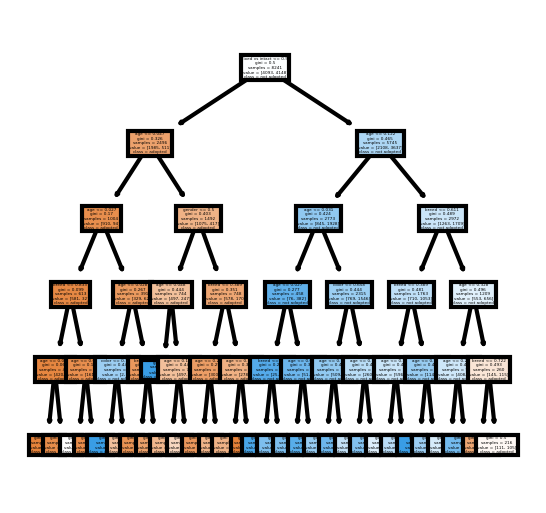

In [110]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Train the model on the data

fn=['age', 'color', 'breed', 'gender', 'fixed vs intact']
cn=['adopted', 'not adopted']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)

fig = tree.plot_tree(dt2,
           feature_names = fn, 
           class_names=cn,
           filled = True);


In [ ]:
# import graphviz 

# dot_data = tree.export_graphviz(dt2, out_file=None, feature_names=fn, 
#                                 class_names=cn, filled=True, rounded=True,
#                                 special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph

In [88]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus



In [89]:
# !pip install pydotplus

In [92]:
dot_data = StringIO()

export_graphviz(dt2, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names= fn,
               class_names = cn)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [102]:
importances = dt2.feature_importances_
importances

array([0.18248275, 0.00996237, 0.02710315, 0.00987216, 0.77057958])

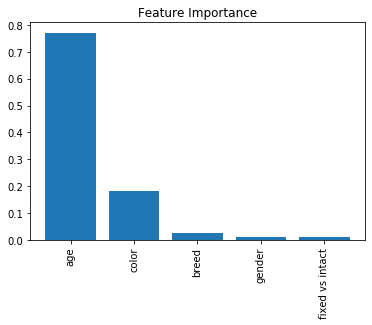

In [108]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = fn

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()